In [1]:
# API Key:LX71H2XX0HSO5PAO 

In [79]:
import requests
import json
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import statsmodels.api as sm
import warnings
from itertools import product

warnings.filterwarnings('ignore')
# plt.style.use('seaborn-poster')

In [27]:
# getting the data from aplhavantage using API key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=CRM&outputsize=full&apikey=LX71H2XX0HSO5PAO'
resp = requests.get(url)
resp.json()['Meta Data']

{'1. Information': 'Daily Time Series with Splits and Dividend Events',
 '2. Symbol': 'CRM',
 '3. Last Refreshed': '2020-02-13',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [28]:
df = pd.DataFrame(resp.json()['Time Series (Daily)']) # converting json to dataframe

In [29]:
df.tail() # initial look of df

,2020-02-13,2020-02-12,2020-02-11,2020-02-10,2020-02-07,2020-02-06,2020-02-05,2020-02-04,2020-02-03,2020-01-31,...,2004-07-07,2004-07-06,2004-07-02,2004-07-01,2004-06-30,2004-06-29,2004-06-28,2004-06-25,2004-06-24,2004-06-23
4. close,188.6400,189.4600,189.1100,189.1200,185.7200,186.7300,185.4900,188.3400,185.4200,182.3100,...,16.3100,17.0000,16.9800,16.0300,16.0700,16.4000,16.0000,15.8000,16.7600,17.2000
5. adjusted close,188.6400,189.4600,189.1100,189.1200,185.7200,186.7300,185.4900,188.3400,185.4200,182.3100,...,4.0775,4.2500,4.2450,4.0075,4.0175,4.1000,4.0000,3.9500,4.1900,4.3000
6. volume,3117583,4533345,4298229,3872433,3712487,4102710,6161868,3982723,4755057,4190229,...,446900,304200,248300,438700,521900,528000,567700,1677500,2221800,10893600
7. dividend amount,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8. split coefficient,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [38]:
# saving as csv
# df.to_csv('CRM_stock')

In [30]:
# transposing the dataframe
pd.to_datetime(df.columns)
df_transposed = df.transpose().set_index(df.columns)

In [31]:
df_transposed.head() # initial look

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2020-02-13,188.5000,191.0500,188.4200,188.6400,188.6400,3117583,0.0000,1.0000
2020-02-12,189.7100,190.5200,186.7700,189.4600,189.4600,4533345,0.0000,1.0000
2020-02-11,191.4800,192.6000,188.6500,189.1100,189.1100,4298229,0.0000,1.0000
2020-02-10,186.1700,189.2700,185.5618,189.1200,189.1200,3872433,0.0000,1.0000
2020-02-07,186.8500,188.6500,185.6500,185.7200,185.7200,3712487,0.0000,1.0000


In [32]:
# removing unused features
df_transposed.drop(columns=['1. open','2. high', '3. low', '4. close','7. dividend amount','8. split coefficient'],inplace=True)

In [33]:
df_transposed.head() 

,5. adjusted close,6. volume
2020-02-13,188.6400,3117583
2020-02-12,189.4600,4533345
2020-02-11,189.1100,4298229
2020-02-10,189.1200,3872433
2020-02-07,185.7200,3712487


In [34]:
# converting dtypes to float
df_transposed['5. adjusted close'] = df_transposed['5. adjusted close'].astype(float)
df_transposed['6. volume'] = df_transposed['6. volume'].astype(float)

In [35]:
df_transposed.sort_index(ascending=True,inplace=True) # resampling time-index 

In [36]:
df_transposed.index = pd.to_datetime(df_transposed.index) # converting to datetime

In [37]:
df_transposed.index

DatetimeIndex(['2004-06-23', '2004-06-24', '2004-06-25', '2004-06-28',
               '2004-06-29', '2004-06-30', '2004-07-01', '2004-07-02',
               '2004-07-06', '2004-07-07',
               ...
               '2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13'],
              dtype='datetime64[ns]', length=3939, freq=None)

In [39]:
# resampling to weekly, monthly, quarterly and yearly periods
df_weekly = df_transposed.resample('W').mean()

In [40]:
# resampling to weekly, monthly, quarterly and yearly periods
df_monthly = df_transposed.resample('M').mean()
df_quart = df_transposed.resample('Q-DEC').mean()
df_annual = df_transposed.resample('A-DEC').mean()

In [41]:
df_weekly.head()

,5. adjusted close,6. volume
2004-06-27,4.146667,4.930967e+06
2004-07-04,4.074000,4.609200e+05
2004-07-11,4.090625,3.612750e+05
2004-07-18,3.991000,4.952800e+05
2004-07-25,3.489500,2.005720e+06


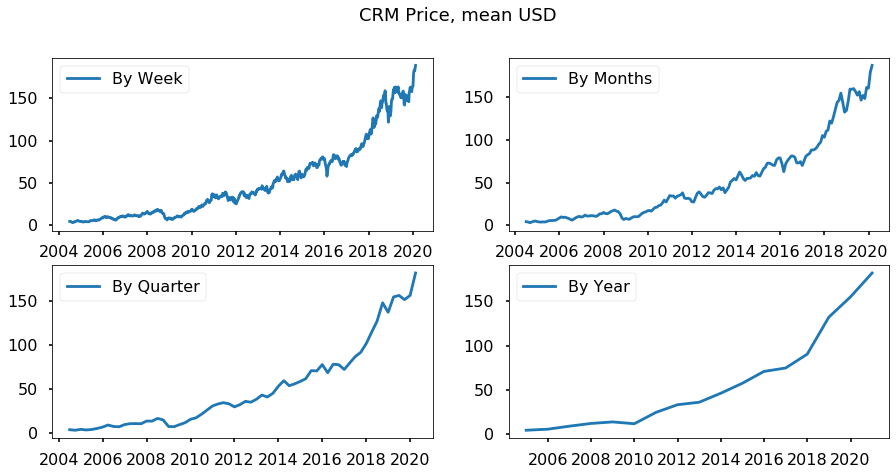

In [51]:
# plots

fig = plt.figure(figsize=[15, 7])
plt.suptitle('CRM Price, mean USD', fontsize=18)

plt.subplot(221)
plt.plot(df_weekly['5. adjusted close'], '-', label='By Week')
plt.legend()

plt.subplot(222)
plt.plot(df_monthly['5. adjusted close'], '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_quart['5. adjusted close'], '-', label='By Quarter')
plt.legend()

plt.subplot(224)
plt.plot(df_annual['5. adjusted close'], '-', label='By Year')
plt.legend()

# plt.tight_layout()
plt.show()

We can see on the graph when we take average of larger time periods the line gets smoother and smoother. I will predict weekly and monthly stock price of the Salesforce Inc.

In [57]:
# rename price column
def rename_col(df,col):
    df.rename(columns={col: "Price"},inplace=True)

In [58]:
#renaming
rename_col(df_weekly,'5. adjusted close')
rename_col(df_monthly,'5. adjusted close')
rename_col(df_quart,'5. adjusted close')
rename_col(df_annual,'5. adjusted close')

In [71]:
# dickey-fuller test for stationary check
def DF_test(df):
    plt.figure(figsize=[10,5])
    sm.tsa.seasonal_decompose(df.Price).plot()
    print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df.Price)[1])
    plt.show()

Dickey–Fuller test: p=1.000000


<Figure size 720x360 with 0 Axes>

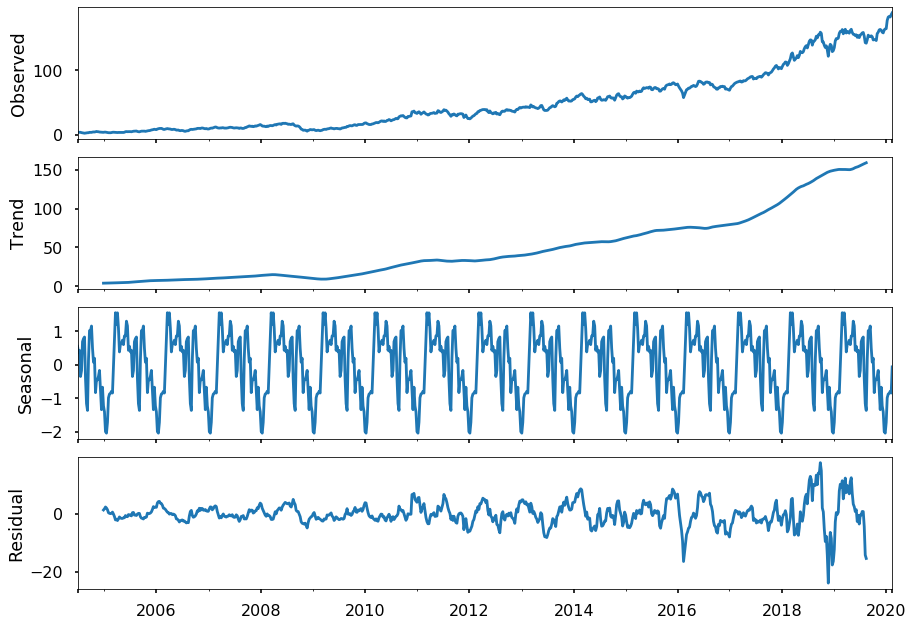

In [72]:
DF_test(df_weekly)

Dickey–Fuller test: p=1.000000


<Figure size 720x360 with 0 Axes>

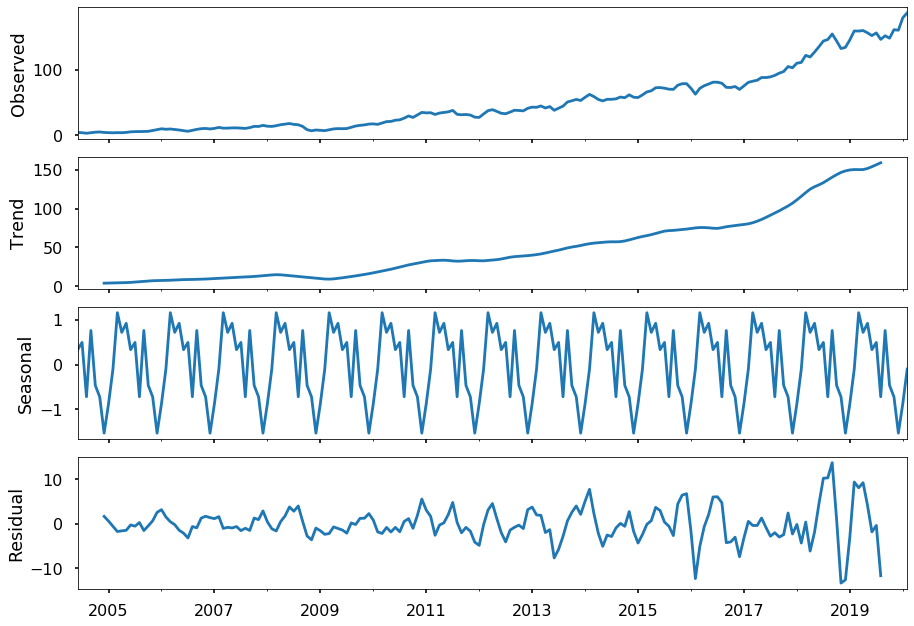

In [73]:
DF_test(df_monthly)

Dickey–Fuller test: p=0.998961


<Figure size 720x360 with 0 Axes>

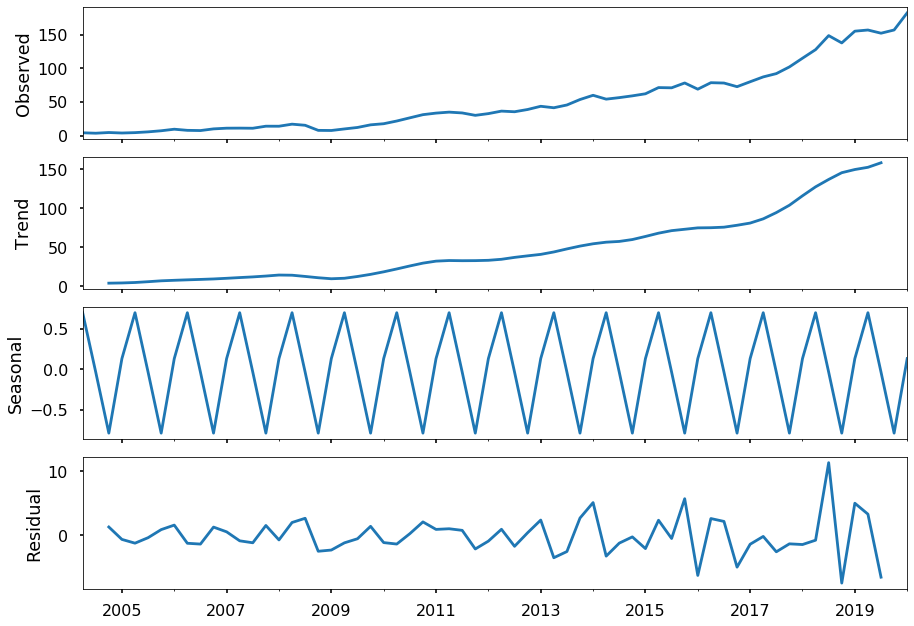

In [74]:
DF_test(df_quart)

* The data is not stationary as we can see on the graph. We can use oother methods to check this.

In [88]:
# we split the data into 3 parts and compare its mean and variance
# weekly 
one, two, three = np.split(
        df_weekly['Price'].sample(
        frac=1), [int(.25*len(df_weekly['Price'])),
        int(.75*len(df_weekly['Price']))])

mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()

print (mean1, mean2, mean3)
print (var1, var2, var3)

47.57015870098041 51.264755616830016 52.65007804878052
2045.1449854690702 2075.162232516566 2376.389711750311


In [87]:
# we split the data into 3 parts and compare its mean and variance
# monthly 
one, two, three = np.split(
        df_monthly['Price'].sample(
        frac=1), [int(.25*len(df_monthly['Price'])),
        int(.75*len(df_monthly['Price']))])

mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()

print (mean1, mean2, mean3)
print (var1, var2, var3)

39.742053023347616 56.81752797994129 50.245373330110716
1233.116147624525 2736.749363422467 1957.2101506689542


In [89]:
# we split the data into 3 parts and compare its mean and variance
# quarterly 
one, two, three = np.split(
        df_quart['Price'].sample(
        frac=1), [int(.25*len(df_quart['Price'])),
        int(.75*len(df_quart['Price']))])

mean1, mean2, mean3 = one.mean(), two.mean(), three.mean()
var1, var2, var3 = one.var(), two.var(), three.var()

print (mean1, mean2, mean3)
print (var1, var2, var3)

48.94077602565745 46.66431673248808 62.03923856444435
2814.467939218391 1890.2088422100005 2698.553283872413


* The above code creates three new series. I randomly selected 25% for series one and 75% for the two and three